In [1]:
# ! python extractPSFParameters.py

In [24]:
# import numpy as np
# [(int(np.round(i)) - 1)*.06+.06 for i in np.logspace(0, 3, 15)]

In [1]:
import matplotlib.pyplot as plt
from analyzePSFParameters import psfParameters
import analysisHelper as helper
test = psfParameters(source='data', baseDir='../')

## Centroid motion

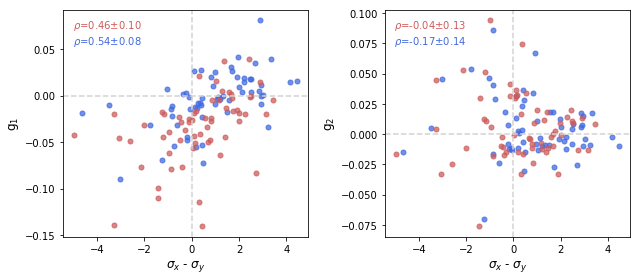

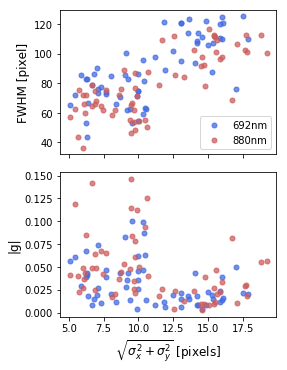

In [2]:
test.loadParameterSet(psfN='15', pix='DSSI')
test.plotCentroids()

## Color dependence of PSF size

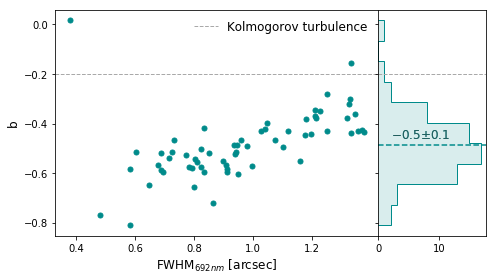

In [3]:
test.chromaticityPlots()

## Plot images of PSFs

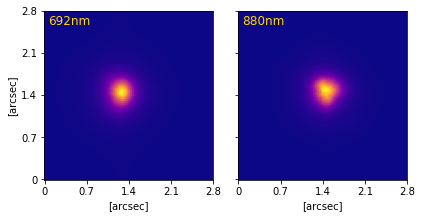

In [10]:
helper.imagePSF('025', save=False)

## Image quality

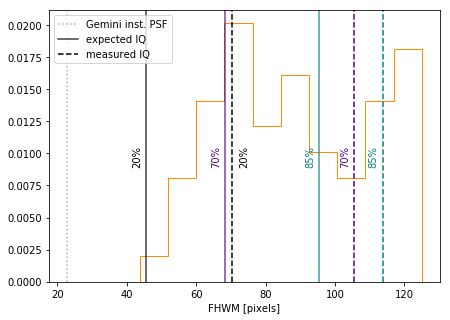

In [6]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats

fig = plt.figure(figsize=(7,5))

ax = plt.subplot(111)
ax.hist(test.parameters['15']['DSSI']['a']['size'][:,-1], density=True, histtype='step', color='darkorange')
a_quants = np.quantile(test.parameters['15']['DSSI']['a']['size'][:,-1], [.2,.7,.85])
ax.set_xlabel('FHWM [pixels]')
lims = ax.axis()
ax.axvline(22.7, alpha=0.5, linestyle=':', label='Gemini inst. PSF')
ax.axvline(45.5, linestyle='-', color='k', alpha=0.75, label='expected IQ')
ax.text(45.5-4, .01, '20%', color='k', rotation=90)
ax.axvline(68.2, linestyle='-', color='indigo', alpha=0.75)
ax.text(68.2-4, .01, '70%', color='indigo', rotation=90)
ax.axvline(95.5, linestyle='-', color='teal', alpha=0.75)
ax.text(95.5-4, .01, '85%', color='teal', rotation=90)
ax.axvline(a_quants[0], linestyle='--', color='k', label='measured IQ')
ax.text(a_quants[0]+2, .01, '20%', color='k', rotation=90)
ax.axvline(a_quants[1], linestyle='--', color='indigo')
ax.text(a_quants[1]-4, .01, '70%', color='indigo', rotation=90)
ax.axvline(a_quants[2], linestyle='--', color='teal')
ax.text(a_quants[2]-4, .01, '85%', color='teal', rotation=90)

ax.legend(loc=2)
plt.show()

## Plot ellipticity components

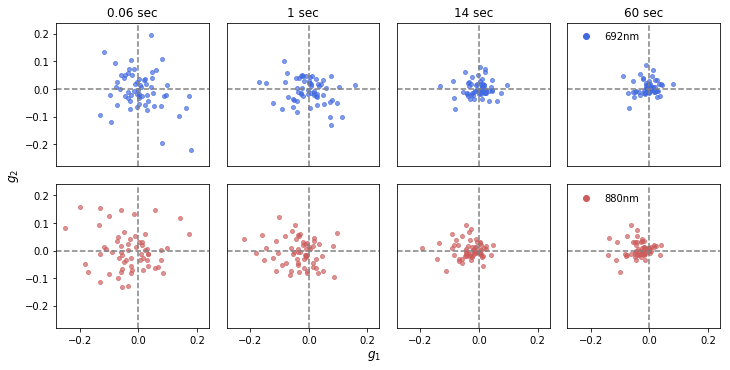

In [5]:
test.plotEComps(pix='DSSI', save=False);

## Compare 30s PSF parameters:

In [8]:
test.analyzeBinnedParameters('DSSI')

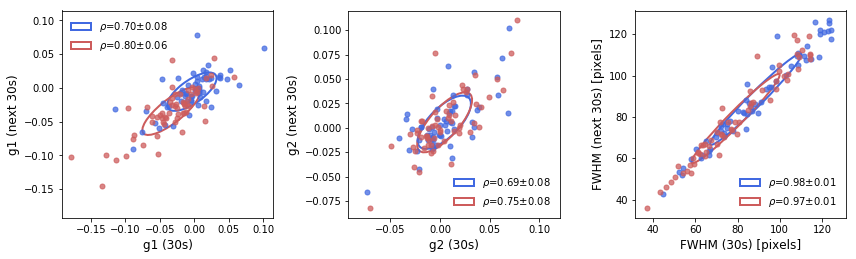

In [9]:
test.plot30sParameters('DSSI', psfN='2', figsize=(12,3.7), ellipse=True, save=False,
                          ellipseArgs={'linewidth':2, 'linestyle':'-'}, alpha=0.75,plotArgs={'ms':5})

## 15 sec ellipticity

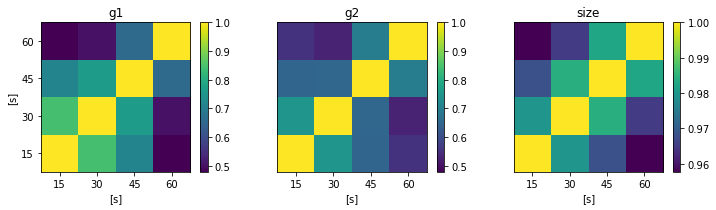

In [3]:
import numpy as np
plt.figure(figsize=(12,2.75))
fifteenSec = np.ones((3,4,4))
for k in range(3):
    param = ['g1','g2','size'][k]
    for i in range(4):
        for j in range(i,4):
            if i!=j:
                fifteenSec[k,i,j] = test.R['4']['DSSI'][param]['a'][f'{i}{j}']
                fifteenSec[k,j,i] = test.R['4']['DSSI'][param]['a'][f'{i}{j}']

vmin, vmax = np.min(fifteenSec[:2]), np.max(fifteenSec[:2])
for k in range(3):
    param = ['g1','g2','size'][k]
    plt.subplot(1,3,k+1)
    if k<2:
        plt.imshow(fifteenSec[k], origin='lower', vmin=vmin, vmax=vmax)
    else: plt.imshow(fifteenSec[k], origin='lower')
    plt.colorbar()
    plt.title(param)
    plt.xticks([0,1,2,3],[15,30,45, 60])
    if k == 0: 
        plt.ylabel('[s]')
        plt.yticks([0,1,2,3],[15,30,45, 60])
    else: plt.yticks([])
    plt.xlabel('[s]')
plt.show()

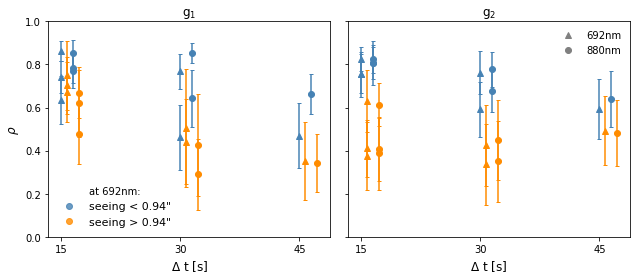

In [6]:
test.plotCorrelations('4', 30, figsize=(9,4))

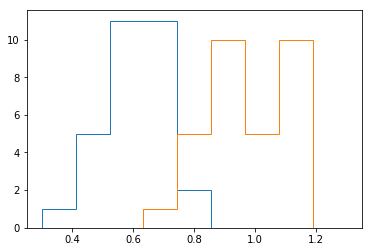

In [54]:
sortedIdx = np.argsort(np.stack([test.parameters[psfN]['DSSI']['a']['size'].mean(axis=1), 
                                 test.parameters[psfN]['DSSI']['b']['size'].mean(axis=1)]).mean(axis=0))
bins=np.linspace(30,130, 10)*.01
plt.hist(test.parameters['4']['DSSI']['b']['size'][sortedIdx[:30],-1]*.01, bins=bins, histtype='step')
plt.hist(test.parameters['4']['DSSI']['b']['size'][sortedIdx[30:],-1]*.01, bins=bins, histtype='step')
plt.show()

## 5s ellipticity

loading in correct dataset...


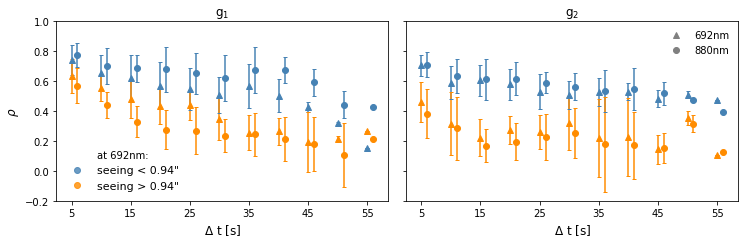

In [4]:
test.plotCorrelations('12', 30)

## Plot ellipticity dropoff

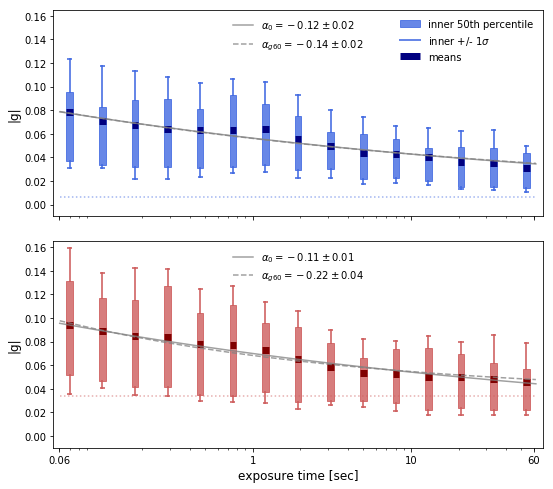

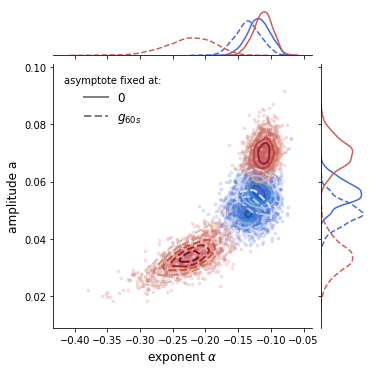

In [4]:
test.analyzeEMag(pix='DSSI', plot=True, expectedAsymptote=True)